## Deep Sentence Embedder with Tensorflow

##### Author: Jessica Khaskheli

##### Collaborators: None

##### Date: May 15, 2022

##### Problem Description: 
This project involves the analysis of essay data, which consists of 1515 rows of training data with two columns: one column for raw text from essays, and one column to show the score the essay received. The test data include 268 observations of raw text from essays and the scores they recieved. In this project, I aim to conduct exploratory data analysis to understand the data I'm working with, clean the text data, train it on a few classifiers to evaluate their performance and use a deep sentence embedder to evaluate classifer performance.

## Set-up and Initializing

## 1:

In [1]:
# reading in tensorflow package and other relevant packages
from numpy.random import seed
import tensorflow as tf
import pandas as pd
seed(1234)
tf.random.set_seed(seed = 1234)

## 2:

In [2]:
train = pd.read_csv('titledtrain.tsv', sep='\t')
test = pd.read_csv('titledtest.tsv', sep='\t')

print("No. of Train Observations:", train.shape)
print("No. Test Observations:", test.shape)

No. of Train Observations: (1515, 2)
No. Test Observations: (268, 2)


## 3:
**Creating vector of training labels**

I plan to create a vector of training and test labels and use the `value_counts()` function to plot the distribution of essay scores using a barplot. I plan create two separate barplots to compare the training and testing labels separately and comment on the similarities and differences in their distributions.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '8'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '7'),
  Text(4, 0, '6'),
  Text(5, 0, '11'),
  Text(6, 0, '12'),
  Text(7, 0, '5'),
  Text(8, 0, '4'),
  Text(9, 0, '2'),
  Text(10, 0, '3')])

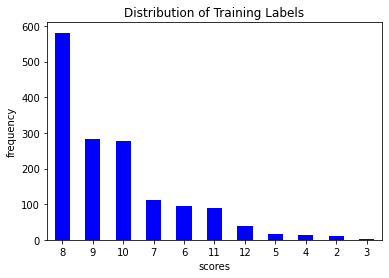

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# creating vector for train and test labels
train_labels = np.array(train.score)
test_labels = np.array(test.score)

# looking at distribution of train labels
fig, ax = plt.subplots()
train['score'].value_counts().plot(ax=ax, kind='bar', color = 'b')
plt.xlabel("scores")
plt.ylabel("frequency")
plt.title("Distribution of Training Labels")
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '8'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '7'),
  Text(4, 0, '11'),
  Text(5, 0, '6'),
  Text(6, 0, '12'),
  Text(7, 0, '4'),
  Text(8, 0, '5')])

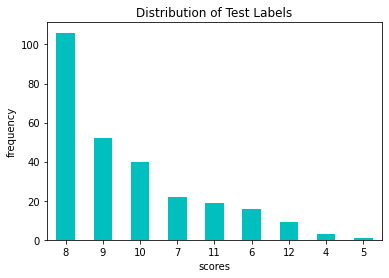

In [4]:
fig, ax = plt.subplots()
test['score'].value_counts().plot(ax=ax, kind = 'bar', color = 'c')
plt.xlabel("scores")
plt.ylabel("frequency")
plt.title("Distribution of Test Labels")
plt.xticks(rotation = 0)

### What does the distribution of labels look like for the training set and the test set?

The distribution between the training and testing labels are fairly similar. From plotting their distributions separately instead of together in the same plot, I can see that the Training labels take on values of 2, 3, and 4 at the lower end of the plot whereas the Testing labels only take on minimum values of 4. Other than this, I can see that the Training labels have almost the same count of 9 and 10 scores while in the Testing label set, there are more essays that take on a score of 9 than 10. Overall, the two disbributions follow the same pattern of being skewed right.

## 4:

Convert the training data to lower case. Remove punctuation from the training data. Also
remove stop words from the training data using the NLTK package’s English stop word list. In
addition to NLTK’s stopwords, are there words specific to this dataset that may be worthwhile
to treat as stop words? What are these words and why would you exclude them? Remove
these additional stop words from the training data as well (note: you can also remove this
secondary set of stop words after tokenizing. However, keep in mind that this may cause
feature alignment issues with your test dataset when you tokenize it.)

In terms of data cleaning, I plan to remove punctuation marks suchs as dashes, periods, commas, brackets and other special characters using the `re` package and sub function to remove the punctuation mark and replace it with an empty string. I also plan to convert all the letters to lowercase form. I plan to have all of my cleaning commands within a for loop and run my essay data in the form of a list through it. Within the for loop, I plan to include a line of code that will remove stopwords from the `nltk` library. I also plan to have two different columns of cleaned text: (1) containing stopwords and (2) not containing stopwords. The column of cleaned text that contains stopwords will later be used for sentiment analysis using TextBlob because the exclusion of stopwords can change the sentiment of a piece of text. Within my for loop with cleaning code, I plan to use `word_tokenize` from the `nltk` library.

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stopeng = set(stopwords.words('english'))
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [6]:
train_list = train['essay'].tolist() # using tolist() to convert essay data to list

In [7]:
# cleaning without taking our stop words so I can do sentiment analysis
clean_w_stop_train = []
for row in train_list:
    row = row.lower() # making all letters lowercase
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row) 
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    row = re.sub('\-','', row)
    row = re.sub('\.','', row)
    row = re.sub('\n','', row)
    row = re.sub('\,','', row)
    tokens = word_tokenize( row.lower() )
    cleaned_words = " ".join(tokens)
    clean_w_stop_train.append(cleaned_words)

In [8]:
cleaned_essay = [] # creating empty list to append cleaned words
for row in train_list:
    row = row.lower() # making all letters lowercase
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row) 
    # removing other words I'm treating as stopwords
    row  = re.sub(r'get', '', row)
    row  = re.sub(r'also', '', row)
    row  = re.sub(r'use', '', row)
    row  = re.sub(r'like', '', row)
    row  = re.sub(r'would', '', row)
    row  = re.sub(r'could', '', row)
    row  = re.sub(r'dont', '', row)
    row  = re.sub(r'many', '', row)
    row  = re.sub(r'want', '', row)
    row  = re.sub(r'much', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    row = re.sub('\-','', row)
    row = re.sub('\.','', row)
    row = re.sub('\n','', row)
    row = re.sub('\,','', row)
    tokens = word_tokenize( row.lower() )
    tokens_nostop = [w for w in tokens if w not in stopeng] # removing stopwords from nltk dictionary
    cleaned_words = " ".join(tokens_nostop)
    cleaned_essay.append(cleaned_words) # appending words to empty list from above

In [9]:
# converting clean training set to dataframe
clean_text = pd.DataFrame(cleaned_essay).rename(columns = {0:'cleantext'})
clean_text.head(1)

,cleantext
0,dear caps caps people world coumputers know co...


- After running my training essay data through my cleaning code, I converted the list back to a dataframe and printed the first row of the cleaned essay text so inspect how well my text was cleaned. From initial inspection, I can see that the text contains no punctuation marks as expected, some words are mispelled which is a characteristic of the writer of the essay. I also notice that every word is in lowercase as expected as well. 
- In the code that I used to remove stopwords, I also chose to remove words like: "get", "also", "use", "like", "would", "could", "don't", "many", "want", "much". I treated these as stopwords as well because they occurred often enough in the text and I didn't think they were unique enough. Initially, I wrote a function using `Counter` that counted the number of frequently occuring words in the text. When displaying the top 30 frequently occuring words, the words I mentioned earlier that I treated as stopwords were mentioned, which led me to make the decision to remove them.

## 5:

I plan to use `PorterStemmer` from the `nltk` library to stem my essay data. I might also consider using `spacy` in order to lemmatize the essay text.

In [10]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_train = [[ps.stem(word) for word in sentence.split(" ")] for sentence in list(cleaned_essay)]

In [11]:
comparison_train = pd.DataFrame() # creating df
comparison_train['stemmed'] = stem_train # adding stemmed text to df
comparison_train['clean_wo_stop'] = clean_text # adding original text to df
comparison_train['clean_w_stop'] = clean_w_stop_train
pd.set_option('display.max_colwidth', -1) # expanding column width to show full text
comparison_train.head(2) # printing first few rows of df to show the stemmed text compared to cleaned

/var/folders/b7/rmg3hfx52jv9khn6bbm73w8c0000gn/T/ipykernel_3165/2301240975.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # expanding column width to show full text


,stemmed,clean_wo_stop,clean_w_stop
0,"[dear, cap, cap, peopl, world, coumput, know, comput, surch, internet, game, work, school, peopl, think, comput, good, help, teach, hand, eye, coordin, learn, place, world, talk, peopl, onlin, num, grade, mystic, middl, school, think, comput, good, peopl, think, ever, heard, comput, camp, kid, go, addict, comput, camp, kid, pull, away, comput, pritti, forc, join, grope, activ, fish, work, toher, solv, mysteri, camp, pritti, known, reliabl, kid, addict, comput, anoth, reason, comput, bad, internet, internet, danger, place, chat, peopl, even, know, never, know, peopl, mess, head, tri, find, cap, come, alway, car, talk, wise, noth, eve, realli, goe, right, comput, alway, ...]",dear caps caps people world coumputers know computers surching internet games work school people think computers good help teach hand eye coordination learn places world talk people online num grade mystic middle school think computers good people think ever heard computer camps kids go addicted computer camp kids pulled away computer pritty forced join gropes activitys fishing working toher solve mystery camp pritty known reliable kids addicted computer another reason computers bad internet internet dangerous place chat people even know never know people messed head try find caps come always carful talk wise nothing eve really goes right computers alway ting slower slower every time every two years kid parent go throw computer computer doesnt right caps vins cost person hundred dollars fixed thing happen time computer caps die work caps data gone forever explaines part computers people think different end one people camp computer never know forever never found alread know caps coomputers fixed might find caps hard way think computers ca truble peolple,dear caps caps people world use coumputers know computers used like surching internet games work school people think computers good use help teach hand eye coordination learn places world talk people online num grade mystic middle school think computers good people think ever heard computer camps kids go addicted computer camp kids pulled away computer pritty much forced join gropes activitys like fishing working together solve mystery camp pritty much known reliable kids addicted computer another reason computers bad internet internet dangerous place chat people dont even know never know people could messed head try find caps like come always carful talk wise could get nothing eve really goes right computers alway getting slower slower every time use every two years kid parent could go throw computer also computer doesnt right caps could get vins cost person hundred dollars get fixed thing could happen time computer caps could die work caps data gone forever explaines part computers people think different would want end like one people camp computer much never know could forever never found alread know caps much coomputers get fixed might find caps hard way think computers cause truble peolple
1,"[dear, newspap, believ, advanc, technolog, posit, effect, comput, comput, great, peopl, age, comput, teach, handey, coordin, allow, peopl, learn, inform, world, lastli, comput, allow, peopl, commun, internet, advanc, technolog, improv, societi, way, life, around, globe, advanc, technolog, amaz, comput, show, advanc, greatli, simpl, comput, one, learn, great, handey, coordin, skill, type, skill, great, exampl, type, skill, need, almost, everyon, world, without, comput, one, skill, young, child, go, comput, play, game, learn, basic, type, handey, coordin, skill, jump, start, coordin, skill, rest, life, advanc, technolog, great, advanc, comput, allow, peopl, learn, worldwid, inform, time, school, student, ask, report, differ, countri, hard, ...]",dear newspaper believe advances technology positive effects computers computers great people ages computers teach handeye coordination allow people learn information world lastly computers allow people communicate internet advances techno

- I experimented with using `spacy` to tokenize and lemmatize the data but I ran into memory and storage issues with `spacy` and would've had to split up my dataframe into parts and put it back together at the end. Using `PorterStemmer` seemed like the simpler and more efficient method which would take in the entire column of essay data, output the stemmed words, and I could easily create a list of those stemmed words for each essay in a dataframe.
- In my dataframe above, I included a column with a list of the stemmed words along with one column of cleaned text including stopwords and one column of cleaned text excluding stopwords. I notice that for words like "computer", "people" or "advance", `PorterStemmer` cuts the word to "comput", "peopl" and "advanc" and it seems to only do this with words ending in "e" or "er".
- Since I only stemmed the cleaned text without stopwords, I only see unique words listed in the 'stemmed' column of my dataframe.

## 6:

I will be using `CountVectorizer` to tokenize my cleaned essay data without stopwords usign unigrams. I will also display the frequency at which these unigrams occur and display the unique unigrams. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

train_text = comparison_train['clean_wo_stop'] #['stemmed'].iloc[0:1] # selecting column with stemmed words
#train_text.dropna() # dropping NaN from df

# defining parameter (1,1) to pull out unigrams
cv = CountVectorizer(stop_words=stopeng, ngram_range=(1,1))

# creating matrix of unigrams
unigrams_train = cv.fit_transform(train_text)

# creating list of ngrams
vocab = cv.vocabulary_ 

# calculating frequency of unigrams
count_values = unigrams_train.toarray().sum(axis=0) 
# creating dataframe of unigrams, frequencies and renaming columns
unigrams_train = pd.DataFrame(sorted([(count_values[i], k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'unigrams'}) 
comparison_train['unigrams'] = unigrams_train['unigrams']

In [13]:
# displaying number of unique unigrams
print('Number of Unique Unigrams:', len(np.unique(unigrams_train['unigrams'])))

Number of Unique Unigrams: 14430


- I didn't set lower or upper bounds on the frequency but I can visually see that words occuring less than 10 times might be removed. At the very bottom of the dataframe, we start getting words like "aaamous" that occur once which could've been removed since it wouldn't have much of an impact for classification purposes when we move to analysis. 
- There are also 14430 unique unigrams in my vocabulary when all the unigrams are included.

## 7:

Process the test data in a manner identical to the training data. Note that you will need to
have the same dimensions for your training and test data. One way in which this can be done
is using sklearn’s CountVectorizer is to fit on the training data and transform the test data.
Show that the number of features for your training and test data are identical.

In [14]:
# converting test set df to list
test_list = test['essay'].tolist()

In [15]:
# processing test data without removing stopwords
# cleaning test set
clean_w_stop_test = [] # creating empty list to append cleaned words
for row in test_list:
    row = row.lower() # making all letters lowercase
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row) 
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    row = re.sub('\-','', row)
    row = re.sub('\.','', row)
    row = re.sub('\n','', row)
    row = re.sub('\,','', row)
    tokens = word_tokenize( row.lower() )
    cleaned_words = " ".join(tokens)
    clean_w_stop_test.append(cleaned_words) 

In [16]:
# processing test data and removing stopwords

# cleaning test set
clean_test = [] # creating empty list to append cleaned words
for row in test_list:
    row = row.lower() # making all letters lowercase
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row) 
    # removing other words I'm treating as stopwords
    row  = re.sub(r'get', '', row)
    row  = re.sub(r'also', '', row)
    row  = re.sub(r'use', '', row)
    row  = re.sub(r'like', '', row)
    row  = re.sub(r'would', '', row)
    row  = re.sub(r'could', '', row)
    row  = re.sub(r'dont', '', row)
    row  = re.sub(r'many', '', row)
    row  = re.sub(r'want', '', row)
    row  = re.sub(r'much', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    row = re.sub('\-','', row)
    row = re.sub('\.','', row)
    row = re.sub('\n','', row)
    row = re.sub('\,','', row)
    tokens = word_tokenize( row.lower() )
    tokens_nostop = [w for w in tokens if w not in stopeng] # removing stopwords from nltk dictionary
    cleaned_words = " ".join(tokens_nostop)
    clean_test.append(cleaned_words) 

In [17]:
# stemming testing set
stem_test = [[ps.stem(word) for word in sentence.split(" ")] for sentence in list(clean_test)]

In [18]:
# comparing stemmed test set and original test set
comparison_test = pd.DataFrame() # creating df
comparison_test['stemmed'] = stem_test # adding stemmed text to df
comparison_test['clean_wo_stop'] = clean_test # adding original text to df
comparison_test['clean_w_stop'] = clean_w_stop_test # adding column w clean text w stopwords
pd.set_option('display.max_colwidth', -1) # expanding column width to show full text

/var/folders/b7/rmg3hfx52jv9khn6bbm73w8c0000gn/T/ipykernel_3165/500936892.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # expanding column width to show full text


In [19]:
# tokenizing stemmed, cleaned test set with unigrams using same code I wrote for train set

test_text = (comparison_test['clean_wo_stop']) # selecting column with stemmed words
test_text = test_text.dropna() # dropping NaN from df

# defining parameter (1,1) to pull out unigrams
cv = CountVectorizer(stop_words=stopeng, ngram_range=(1,1))

# creating matrix of unigrams
unigrams_test = cv.fit_transform(test_text)

# creating list of ngrams
vocab = cv.vocabulary_ 

# calculating frequency of unigrams
count_values = unigrams_test.toarray().sum(axis=0) 
# creating dataframe of unigrams, frequencies and renaming columns
unigrams_test = pd.DataFrame(sorted([(count_values[i], k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'unigrams'}) 
comparison_test['unigrams'] = unigrams_test['unigrams']

In [20]:
print('Training set features:', comparison_test.head(1)) # printing first few rows of df to show the stemmed text compared to cleaned
print('Testing set features:', comparison_train.head(1))

Training set features:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          stemmed  \
0  [dear, editor, ever, know, someth, badli, cant, focu, anyth, els, ever, tri, find, inform, anahhah, moment, search, knowledg, probabl, comput, need, type, request, hit, enter, viola, screen, fill, choic, inform, site, comput, help, pe

In [21]:
print('Training set Shape:', comparison_train.shape)
print('Test set Shape:', comparison_test.shape)

Training set Shape: (1515, 4)
Test set Shape: (268, 4)


- I included the features: 'stemmed', 'clean_w_stop', 'clean_wo_stop' and 'unigrams' which are the stemmed words from the cleaned text excluding stopwords, the cleaned text with stopwords, the cleaned text without stopwords and the unigram for each essay.
- Both the training and test sets have these three features included in their dataframes. And their shapes are still consistent with their shapes before text processing.

## Supervised Learning

## 7:

I plan to use `TextBlob` to conduct sentiment analysis on the essay text and include a 'polarity' feature and a 'subjectivity' feature for both the training and test sets. I also plan to include the word count of the original essay text including all words and punctuation marks as a feature. I will also be including the parts of speech as a feature in both sets where I plan to use `NLP` from the `nltk` library.

In [22]:
# sentiment analysis with TextBlob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity 
sub = lambda x: TextBlob(x).sentiment.subjectivity 

comparison_train['polarity'] = comparison_train['clean_w_stop'].apply(pol) # applying the polarity function to each row to calculate polarity
comparison_train['subjectivity'] = comparison_train['clean_w_stop'].apply(sub) # applying the subjectivity function to each row to calculate subjectivity
comparison_test['polarity'] = comparison_test['clean_w_stop'].apply(pol) # applying the polarity function to each row to calculate polarity
comparison_test['subjectivity'] = comparison_test['clean_w_stop'].apply(sub) # applying subjectivity function to calculate subjectivity for each row

In [23]:
# parts of speech for training set
train_list = list(comparison_train['clean_w_stop']) # converting clean with stopwords tweets to list
pos = nltk.pos_tag(train_list) # POS tagging for each tokenized tweet

pos_df = pd.DataFrame(pos) # creating df with tags
pos_df.rename(columns = {0: 'text'}, inplace = True) # renaming column headers
pos_df.rename(columns = {1: 'POS'}, inplace = True)
comparison_train['POS'] = pos_df['POS']

# retrieving POS for test set
test_list = list(comparison_test['clean_w_stop'])
pos_test = nltk.pos_tag(test_list)
pos_test_df = pd.DataFrame(pos_test)
pos_test_df.rename(columns = {1: 'POS'}, inplace = True)
comparison_test['POS'] = pos_test_df['POS']

In [24]:
#list for length of words in each tweet for train set
text_length = []

#for loop going through each tweet in the text column of the dataframe
for tweet in comparison_train['clean_w_stop']:
    tweet_length = len(tweet.split())
    text_length.append(tweet_length)
#creating a dataframe out of the word length list, then joining it to the main dataframe 
text_length_df = pd.DataFrame(text_length)
text_length_df.columns = ["word_count"] 
#joining dataframe of word lengths to main dataframe
comparison_train = comparison_train.join(text_length_df)
comparison_train.head()

,stemmed,clean_wo_stop,clean_w_stop,unigrams,polarity,subjectivity,POS,word_count
0,"[dear, cap, cap, peopl, world, coumput, know, comput, surch, internet, game, work, school, peopl, think, comput, good, help, teach, hand, eye, coordin, learn, place, world, talk, peopl, onlin, num, grade, mystic, middl, school, think, comput, good, peopl, think, ever, heard, comput, camp, kid, go, addict, comput, camp, kid, pull, away, comput, pritti, forc, join, grope, activ, fish, work, toher, solv, mysteri, camp, pritti, known, reliabl, kid, addict, comput, anoth, reason, comput, bad, internet, internet, danger, place, chat, peopl, even, know, never, know, peopl, mess, head, tri, find, cap, come, alway, car, talk, wise, noth, eve, realli, goe, right, comput, alway, ...]",dear caps caps people world coumputers know computers surching internet games work school people think computers good help teach hand eye coordination learn places world talk people online num grade mystic middle school think computers good people think ever heard computer camps kids go addicted computer camp kids pulled away computer pritty forced join gropes activitys fishing working toher solve mystery camp pritty known reliable kids addicted computer another reason computers bad internet internet dangerous place chat people even know never know people messed head try find caps come always carful talk wise nothing eve really goes right computers alway ting slower slower every time every two years kid parent go throw computer computer doesnt right caps vins cost person hundred dollars fixed thing happen time computer caps die work caps data gone forever explaines part computers people think different end one people camp computer never know forever never found alread know caps coomputers fixed might find caps hard way think computers ca truble peolple,dear caps caps people world use coumputers know computers used like surching internet games work school people think computers good use help teach hand eye coordination learn places world talk people online num grade mystic middle school think computers good people think ever heard computer camps kids go addicted computer camp kids pulled away computer pritty much forced join gropes activitys like fishing working together solve mystery camp pritty much known reliable kids addicted computer another reason computers bad internet internet dangerous place chat people dont even know never know people could messed head try find caps like come always carful talk wise could get nothing eve really goes right computers alway getting slower slower every time use every two years kid parent could go throw computer also computer doesnt right caps could get vins cost person hundred dollars get fixed thing could happen time computer caps could die work caps data gone forever explaines part computers people think different would want end like one people camp computer much never know could forever never found alread know caps much coomputers get fixed might find caps hard way think computers cause truble peolple,computers,0.051566,0.446303,JJ,192
1,"[dear, newspap, believ, advanc, technolog, posit, effect, comput, comput, great, peopl, age, comput, teach, handey, coordin, allow, peopl, learn, inform, world, lastli, comput, allow, peopl, commun, internet, advanc, technolog, improv, societi, way, life, around, globe, advanc, technolog, amaz, comput, show, advanc, greatli, simpl, comput, one, learn, great, handey, coordin, skill, type, skill, great, exampl, type, skill, need, almost, everyon, world, without, comput, one, skill, young, child, go, comput, play, game, learn, basic, type, handey, coordin, skill, jump, start, coordin, skill, rest, life, advanc, technolog, great, advanc, comput, allow, peopl, learn, worldwid, inform, time, school, student, ask, report, differ, countri, hard, ...]",dear newspaper believe advances technology positive effects computers computers great people ages computers teach handeye coordination allow people learn inf

In [25]:
# adding word count column for test set
text_length_test = []

#for loop going through each tweet in the text column of the dataframe
for tweet in comparison_test['clean_w_stop']:
    tweet_length = len(tweet.split())
    text_length_test.append(tweet_length)
#creating a dataframe out of the word length list, then joining it to the main dataframe 
text_length_df = pd.DataFrame(text_length_test)
text_length_df.columns = ["word_count"] 
#joining dataframe of word lengths to main dataframe
comparison_test = comparison_test.join(text_length_df)

## Ridge Linear Regression Model

I plan to implement a Ridge Linear Regression Model to evaluate how well my features perform in predicting the essay scores.

In [27]:
# defining X test and y test, copying for use from earlier in Q3
train_labels = np.array(train.score) # X_test
test_labels = np.array(test.score) # y_test

In [28]:
# defining X train and y train with polarity, subjectivity and word_count as features
X_train = comparison_train[['polarity', 'word_count','subjectivity']] #'bigrams_trigrams']]
X_test = comparison_test[['polarity', 'word_count','subjectivity']] #'bigrams_trigrams']]
y_train = train_labels
y_test = test_labels

In [29]:
X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

(1515, 3)

In [30]:
from sklearn.linear_model import Ridge
model1 = Ridge(alpha= 0.3) # calling the model
model1.fit(X_train, y_train) #fitting model to the data

Ridge(alpha=0.3)

In [31]:
print('Model coefficients:', model1.coef_) # displaying the coefficients
print('Models intercept:', model1.intercept_) # displaying the intercept

Model coefficients: [-0.04876533  0.01985521  0.46372901]
Models intercept: 4.637783287575222


In [32]:
# predicting y_test
pred1 = model1.predict(X_test)

In [33]:
# calculating r squared value
from sklearn.metrics import r2_score
model1_r2 = r2_score(y_test, pred1)
print('R Squared Value:', model1_r2)

R Squared Value: 0.6423512280776462


In [34]:
# calculating mean squared error
from sklearn.metrics import mean_squared_error
model1_error = mean_squared_error(y_test, pred1)
print('Mean Squared Error:', model1_error)

Mean Squared Error: 0.7729404234361141


In [35]:
# defining X train and y train with polarity and subjectivity as features
X_train_2 = comparison_train[['polarity', 'subjectivity']]
X_test_2 = comparison_test[['polarity', 'subjectivity']]
y_train_2 = train_labels
y_test_2 = test_labels

In [36]:
model2 = Ridge(alpha = 0.3)
model2.fit(X_train_2, y_train_2)

Ridge(alpha=0.3)

In [37]:
pred2 = model2.predict(X_test_2)

In [38]:
model2_r2 = r2_score(y_test, pred1)
print('R Squared Value:', model2_r2)
model2_error = mean_squared_error(y_test_2, pred2)
print('Mean Squared Error:', model2_error)

R Squared Value: 0.6423512280776462
Mean Squared Error: 2.1466082143041265


In [43]:
# defining X train and y train with word count as only feature
X_train = comparison_train['word_count'].array.reshape(-1, 1)
X_test = comparison_test['word_count'].array.reshape(-1, 1)
y_train = train_labels
y_test = test_labels

In [44]:
model3 = Ridge(0.3)
model3.fit(X_train, y_train)

Ridge(alpha=0.3)

In [45]:
pred3 = model3.predict(X_test)

In [46]:
model3_r2 = r2_score(pred3, y_test)
print('R Squared Value:', model3_r2)
model3_error = mean_squared_error(pred3, y_test)
print('Mean Squared Error:', model3_error)

R Squared Value: 0.5404847261220544
Mean Squared Error: 0.7708261022108951


In [47]:
# creating dataframe of predicted and true values to graph
error_rates = pd.DataFrame()
error_rates['model1'] = pred1
error_rates['model2'] = pred2
error_rates['model3'] = pred3
error_rates['true'] = y_test
error_rates.head() # showing head of predictions and true score values

,model1,model2,model3,true
0,11.287965,8.430266,11.306022,11
1,9.027684,8.513513,8.998404,9
2,10.468847,8.571372,10.450612,11
3,8.950417,8.536032,8.938724,10
4,9.514066,8.413337,9.555415,12


([], [])

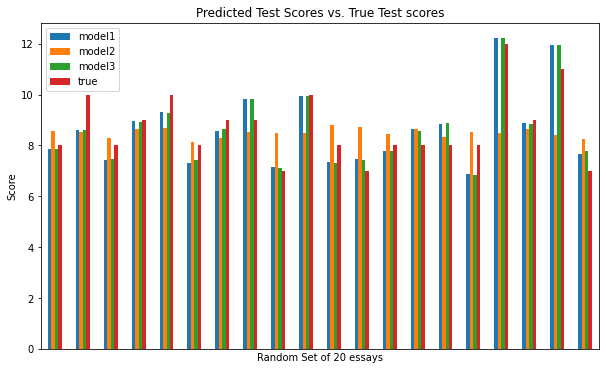

In [48]:
import matplotlib.pyplot as plt
error_rate_subset = error_rates.sample(n= 20) # selecting 20 random points from each column to plot
error_rate_subset.plot(kind='bar',figsize=(10,6))
plt.title('Predicted Test Scores vs. True Test scores')
plt.xlabel('Random Set of 20 essays')
plt.ylabel('Score')
plt.xticks([])

- Since the features I included were polarity scores, subjectivity scores and word count, I found that changes in the alpha value for my Ridge Linear Regression model didn't cause significant changes in the R^2 score. I suspect that this is because of my word counts feature because when I removed it, my R^2 score with only using the polarity and subjectivity scores with keeping alpha at 0.3 was about ~0.2-0.3. When I added the word count feature back in, I found that my R^2 score jumped back up to about ~0.64 and stayed consistent when I change the alpha value to any value between 0 to 10.
- I also created three different Ridge Linear Regression models to compare how accurate they are at predicting the labels and I graphed a random sample of 20 prediction values from each model so that I could compare their values to the true labels. My first model contained polarity scores, subjectivity scores and word count. My second model contained just polarity and subjectivity scores and my third model only contained the word count feature.
- The model that included the word count feature had the highest R^2 score and from inspecting my Predicted Test scores vs. True test scores plot above,I see that it takes on predicted values close to the true value of the labels compared to the predicted values that the other two models generated. 
- Even the model that only contained the word count feature has a slightly lower R^2 score (about 0.1-0.2 units lower) than the model that contained all three features.

## Another model: kNN

I plan to implement a kNN model in order to find which k-value generates the best accuracy score when classifying essay scores. I want to plot the variation in accuracy scores when the k value varies.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# pasting my features and labels again for continuity
X_train = comparison_train[['polarity', 'subjectivity', 'word_count']]
X_test = comparison_test[['polarity', 'subjectivity', 'word_count']]
y_train = train_labels
y_test = test_labels

# empty lists to store k values and accuracy scores for graphing
x = []
y = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    y = np.append(y, accuracy_score(y_test, pred_knn))
    x = np.append(x, k)

Text(0.5, 1.0, 'Variation in Accuracy values for different K value using kNN')

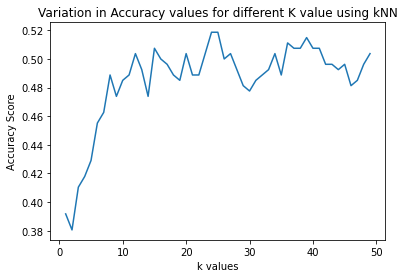

In [50]:
# plotting k values and accuracy scores for kNN model
plt.plot(x, y)
plt.xlabel('k values')
plt.ylabel('Accuracy Score')
plt.title('Variation in Accuracy values for different K value using kNN')

In [51]:
print('MSE for kNN model:', mean_squared_error(y_test, pred_knn))

MSE for kNN model: 0.9029850746268657


- From my implementation of the kNN model, I found that the accuracy scores plateau at about k = 10 with some variation in accuracy scores with k greater than 10. I found that k = 12 produced the highest accuracy score at about 0.503. I think that if I had added text features, like unigrams and bigrams, I might've been able to achieve a higher accuracy score however, I went through a lot of preprocessing errors when including my 'unigrams' feature so I decided to only include features with numerical values which included polarity scores, subjectivity scores and word count.
- My MSE error is about 0.9 in this case, and I calculated it so that I can compare its value to my other models in the next parts for perforamance evaluation.

## 9: SVMs Using GridSearch CV to find best hyperparameters

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kernel = ['linear']
C = [1]
gamma = ['scale']
svc = SVC()
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
gridcv_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
svm_result = gridcv_search.fit(X_train, y_train)
svm_pred = svm_result.predict(X_test)

# printing largest accuracy score I could get
print("Best: %f using %s" % (svm_result.best_score_, svm_result.best_params_))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best: 0.512881 using {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [53]:
print('MSE for SVM model:', mean_squared_error(y_test, svm_pred))

MSE for SVM model: 0.9626865671641791


- Using the same features that I've used in my previous models, I found that setting my parameters for my SVM model to kernel = 'linear, gamma = 'scale', C = 1 were the best hyperparameters to use for my feature classification.
- I used GridSearchCV to choose the best hyperparameters. I tried the following hyperparameters: C = [1, 10, 100, 1000], gamma = 'scale', 'auto', kernel = 'rbf', 'linear', 'kernel', 'gamma'. I found that including all of these hyerparameters and letting GridSearchCV choose took a very long time to run so I didn't include these choices back into my model after it ran once so that it could run faster when run again. 
- I also found that I didn't obtain a high enough accuracy score from my SVM model. An accuracy score of 0.512 is barely better than a random classification.
- I would add text features if I were to do this again but I also had a hard time resolving preprocessing errors when including my POS and unigram features.
- In this case, my MSE is about 0.96 which is about 0.2 larger than the MSE that the Ridge model produced.

## 10:
- Compared to my kNN model, the Ridge Linear Regression model performed the strongest with an alpha value of 0.3 and with the features being polarity scores, subjectivity scores and word count in both models in order to maintain consistency when comparing their performance. 
- I also observed that there was a lot of variation in the accuracy scores in my kNN model after it plateaued compared to how I would expect the plot of accuracy scores vs. k values to be. I would expect for the plateau to be more or less at the same accuracy score value because after a certain k value, larger k values shouldn't have much of an impact on the accuracy score of the model.
- My SVM model had the longest runtime and had a low accuracy score, similar to kNN's accuracy score, therefore, I might vote it as the worst model out of the three.

## Deep Sentence Embedder

## 13:

In [54]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [55]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

2022-05-19 12:24:25.222051: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
# convering my text from train and test sets to lists
train_tolist = comparison_train['clean_w_stop'].tolist()
test_tolist = comparison_test['clean_w_stop'].tolist()

## 14:

In [76]:
# calling DSE model on train set
emb = model(train_tolist)

In [77]:
# calling model on test set
emb_test = model(test_tolist)

## 15:

In [59]:
# empty lists to store k values and accuracy scores for graphing
# implementing kNN model again with new features
x = []
y = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(emb, y_train)
    pred_knn = knn.predict(emb_test)
    y = np.append(y, accuracy_score(y_test, pred_knn))
    x = np.append(x, k)

Text(0.5, 1.0, 'kNN using Features from Deep Sentence Embedder')

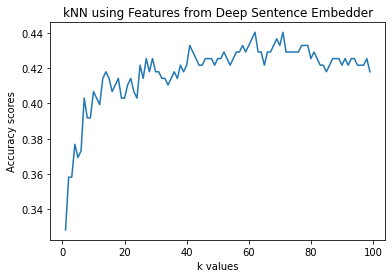

In [60]:
# plotting accuracy score vs. k values
plt.plot(x, y)
plt.xlabel("k values")
plt.ylabel("Accuracy scores")
plt.title("kNN using Features from Deep Sentence Embedder")

In [61]:
emb_r2 = accuracy_score(pred_knn, y_test)
print('Accuracy score:', emb_r2)
modelemb_error = mean_squared_error(pred_knn, y_test)
print('Mean Squared Error:', modelemb_error)

Accuracy score: 0.417910447761194
Mean Squared Error: 1.5820895522388059


- I chose to feed the embeddings into my kNN model from Part 2 because I wanted to see if it would perform better with different features that I didn't have to select. I found that it took for k to reach a very high value until it "plateaued" at an accuracy score. From the graph above, it looks like the accuracy score stabalizes around 40-50 for k but there's still a lot of variation. I would say that using these embeddings are features for my kNN model didn't work as well compared to when I chose my own features because k must take on a much higher value in this case and it doesn't reach ever reach an accuracy score over 0.50 like my kNN model did in Part 2.
- In addition, my accuracy score when calculated between the predicted values and y_test is about 0.38 which is much lower than my accuracy score for my kNN model in Part 2 which was about 0.503. 
- This makes me wonder if the large feature space in this case causes kNN to not be able to predict the y_test values accurately enough which causes such large variations in the accuracy scores.

## Calculating TFIDF weights to observe the difference

I wanted to observe how my SVM and kNN models would perform if I fed TFIDF features into both of them. I plan to extract TFIDF features using `TfidVectorizer` from `sklearn.feature_extraction.text`.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
docs = [" ".join(comparison_train['clean_w_stop']), " ".join(comparison_test['clean_w_stop'])]

In [64]:
# creating vectorizer object
vect = TfidfVectorizer(stop_words='english')

In [65]:
# creating matrix of features
matrix = vect.fit_transform(docs)

In [66]:
# converting matrices to arrays

matrix_array = matrix.toarray()

In [67]:
total_features = vect.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
tfidf_features = pd.DataFrame()
tfidf_features['tokens'] = total_features
tfidf_features['train_tfidf'] = matrix_array[0, :] # tfidf features for train
tfidf_features['test_tfidf'] = matrix_array[1, :] # tfidf features for test

tfidf_features.sort_values(by=['train_tfidf'], ascending=False).head(10) # printing our most relevant weights

,tokens,train_tfidf,test_tfidf
2856,computers,0.455819,0.455859
10416,people,0.439670,0.419193
2842,computer,0.394300,0.373224
2047,caps,0.379715,0.433695
14382,time,0.175474,0.164996
6083,friends,0.119910,0.123131
5541,family,0.107142,0.105893
15025,use,0.105274,0.120121
8383,like,0.100379,0.089749
14262,think,0.096190,0.086465


In [69]:
# appending tfidf features to my main dataframe of features
comparison_test['tfidf_test'] = tfidf_features['test_tfidf']
comparison_test.head()
comparison_train['tfidf_train'] = tfidf_features['train_tfidf']

In [70]:
# implementing SVM model using TFIDF weights as features
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kernel = ['linear']
C = [1, 10, 100, 1000] # trying different C values
gamma = ['scale']
svc = SVC()
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
gridcv_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
svm_result = gridcv_search.fit(comparison_train['tfidf_train'].array.reshape(-1,1), y_train)
svm_predict = svm_result.predict(comparison_test['tfidf_test'].array.reshape(-1, 1))

# printing largest accuracy score I could get
print("Best: %f using %s" % (svm_result.best_score_, svm_result.best_params_))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best: 0.383498 using {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [71]:
print('Accuracy Score for SVM Model:', accuracy_score(y_test, svm_predict))
print('Mean Squared Error:', mean_squared_error(y_test, svm_predict))

Accuracy Score for SVM Model: 0.39552238805970147
Mean Squared Error: 2.5


- In the case of feeding my TFIDF features into my SVM model, I see that the runtime was a lot quicker than it was when I implmented it in Part 2. 
- However, the accuracy score of my SVM model is much lower where now it's 0.39 but it was about 0.51 in Part 2 above. The MSE in this case is more than double the MSE that was produced when I implemented the SVM model in Part 2. This means that this model is not performing as well as the SVM model in Part 2 at predicting the true labels.

In [72]:
# trying to implement kNN model again with TFIDF weights
x = []
y = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(comparison_train['tfidf_train'].array.reshape(-1,1), y_train)
    pred_knn = knn.predict(comparison_test['tfidf_test'].array.reshape(-1, 1))
    y = np.append(y, accuracy_score(y_test, pred_knn))
    x = np.append(x, k)

Text(0, 0.5, 'Accuracy scores')

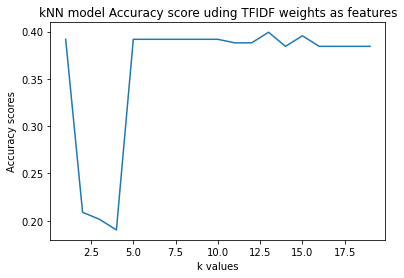

In [73]:
plt.plot(x, y)
plt.title("kNN model Accuracy score uding TFIDF weights as features")
plt.xlabel("k values")
plt.ylabel("Accuracy scores")

In [74]:
print('MSE using TFIDF features with kNN:', mean_squared_error(y_test, pred_knn))

MSE using TFIDF features with kNN: 2.544776119402985


- When implementing my kNN model using TFIDF weights, I found that there was a large drop in the accuracy score at about k = 4 and then a large spike back up to an accuracy score of ~0.4 at k = 5 where it then plateaus. The graph between the accuracy scores and k values when using the TFIDF features pleateaus for the first time, and I don't observe as much variation in accuracy scores as I did in previous parts when I used my own features.
- However, my accuracy score in this case is still lower compared to the previous times I implemented my kNN model which is saying that the model is not performing well at predicting the correct labels using these features.
- The MSE in this case takes on a high value of 2.5 than it did in previous parts. The MSE in this case is almost double than when I implemented my kNN model in Part 2.